# **Soal 1: Jenis-Jenis Tepi**
**Pertanyaan:** Jelaskan empat jenis tepi yang biasa ditemukan dalam citra digital dan beri contoh masing-masing dalam kehidupan sehari-hari. Mengapa tepi dengan derau memerlukan pendekatan khusus untuk pendeteksian?

# **Jawaban:**


1.   Tepi Curam(Step Edge)

  Perubahan intensitas terjadi secara mendadak dalam jarak yang sangat pendek. Tepi ini menunjukkan perubahan intensitas yang tiba-tiba dari satu level ke level lain, biasanya menyerupai bentuk tangga.
  Contohnya dalam kehidupan sehari-hari yaitu seperti tepi bayangan tajam pada dinding yang terkena cahaya terang.
2.   Tepi Landai(Ramp Edge)

  Perubahan intensitas terjadi secara bertahap dalam jarak yang lebih panjang dibanding tepi curam. Contohnya dalam kehidupan Sehari-hari seperti Perubahan warna langit saat senja dari biru ke oranye.
3.   Tepi garis(Line Edge)

  Garis sempit dengan intensitas yang berbeda di antara dua area dengan intensitas serupa. Contohnya dalam Kehidupan Sehari-hari diterapkan seperti pada garis tengah pada jalan aspal
4.   Tepi Atap(Roof Edge)

  Perubahan intensitas berbentuk puncak atau kurva yang menyerupai atap. Contohnya yaitu seperti bayangan benda yang melengkung seperti atap rumah pada permukaan datar.

Tepi dengan derau memerlukan pendekatan khusus karena derau dapat menghasilkan tepi palsu atau menyamarkan tepi yang valid akibat fluktuasi intensitas yang tidak konsisten. Untuk mengatasinya, citra sering dihaluskan terlebih dahulu menggunakan filter seperti Gaussian atau median untuk mengurangi derau tanpa menghilangkan tepi utama. Algoritma tahan derau seperti Canny Edge Detector juga digunakan karena memiliki langkah pelembutan bawaan dan pengaturan ambang batas yang dapat memfilter tepi palsu. Pendekatan ini memastikan hanya tepi yang relevan yang terdeteksi.



# **Soal 2: Pendeteksian Tepi Menggunakan Operator Gradien**
**Pertanyaan:** Operator Sobel dan Prewitt digunakan untuk pendeteksian tepi. Berikan contoh implementasi salah satu operator ini dalam Python menggunakan pustaka seperti NumPy atau OpenCV. Jelaskan langkah-langkahnya secara rinci.

# **Jawaban:**


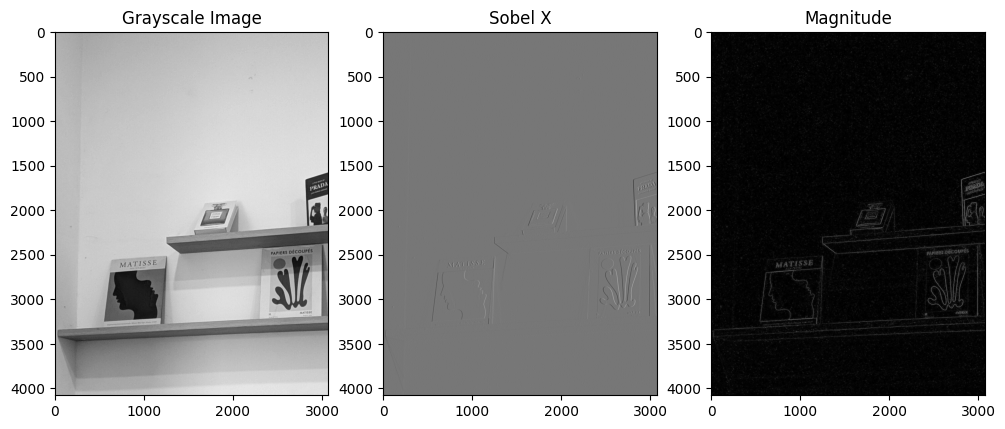

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar
image = cv2.imread('/content/drive/MyDrive/UTS_PCD_2206152/frame.jpeg')  # Ganti dengan path gambar
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Terapkan Sobel Operator
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal

# 3. Hitung magnitude (kombinasi gradien)
magnitude = cv2.magnitude(sobel_x, sobel_y)

# 4. Normalisasi hasil untuk visualisasi
magnitude = np.uint8(255 * magnitude / np.max(magnitude))

# 5. Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(1, 3, 2), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 3), plt.imshow(magnitude, cmap='gray'), plt.title('Magnitude')
plt.show()



Penjelasan Langkah-langkah:

Untuk mendeteksi tepi menggunakan operator Sobel, pertama, citra asli dibaca dan diubah menjadi grayscale untuk menyederhanakan perhitungan intensitas piksel. Kemudian, operator Sobel diterapkan untuk menghitung gradien intensitas dalam arah horizontal (*Sobel X*) italicized text dan vertikal (*Sobel Y*) menggunakan fungsi cv2.sobel(), di mana kernel 3x3 digunakan untuk mendeteksi perubahan intensitas. Setelah itu, gradien horizontal dan vertikal dikombinasikan untuk menghitung magnitude menggunakan rumus
(
𝐺
𝑥
)
2
+
(
𝐺
𝑦
)
2
(G
x
​
 )
2
 +(G
y
​
 )
2, yang mencerminkan kekuatan tepi pada setiap piksel. Hasil magnitude ini dinormalisasi ke rentang [0, 255] agar dapat divisualisasikan dengan jelas. Akhirnya, hasil citra grayscale, gradien horizontal, dan magnitude gabungan ditampilkan menggunakan pustaka seperti Matplotlib untuk menunjukkan area tepi dengan intensitas tinggi. Sehingga dapat dilihat dari hasil gambarnya sangat jelas kita dapat melihat setiap garis tepi pada gambar yang telah dimasukkan


# **Soal 3: Perbandingan Operator Pendeteksi Tepi**
Pertanyaan: Berikan perbandingan antara operator Sobel, Prewitt, dan Canny berdasarkan akurasi dan kompleksitas komputasi. Dalam situasi apa operator Canny lebih direkomendasikan?

# **Jawaban:**

1. Operator Sobel: Dari segi akurasi, operator sobel lebih akurat dibanding Prewitt karena menggunakan bobot kernel yang memberikan prioritas lebih pada piksel tengah, sehingga deteksi tepi lebih sensitif terhadap perubahan intensitas. JIka dari segi Kompleksitas komputasi Kompleksitas operator sobel memiliki kompleksitas rendah hingga sedang, karena hanya menggunakan operasi konvolusi sederhana dengan kernel tetap.

2. Operator Prewit: Segi Akurasi Prewit lebih sederhana dan kurang akurat dibanding Sobel karena bobot kernel semua sama. Untuk Kompleksitas komputasinya rendah, lebih ringan daripada Sobel.

3. Operator Canny: Segi Akurasi sangat tinggi karena melibatkan pelembutan citra dengan Gaussian filter, perhitungan gradien, penipisan non-maksimum, dan histeresis thresholding untuk mengurangi tepi palsu. Jika dari segi kompleksitas komputasi, memiliki Kompleksitas tinggi karena terdiri dari beberapa langkah komputasi, termasuk smoothing dan thresholding adaptif.

Operator Canny lebih direkomendasikan untuk memperbaiki citra yang memiliki derau tinggi sehinngga operator canny diguakan sebagai pelembutan awal dengan Gaussian filter agar membantu mengurangi gangguan dari derau.


# **Soal 4: Pendeteksian Tepi pada Citra Noisy**
Pertanyaan: Sebuah citra memiliki derau "salt-and-pepper". Implementasikan kode Python untuk mendeteksi tepi menggunakan metode Canny dan Sobel setelah melakukan image smoothing menggunakan Gaussian filter. Bandingkan hasilnya dengan citra asli.
# **Jawaban:**

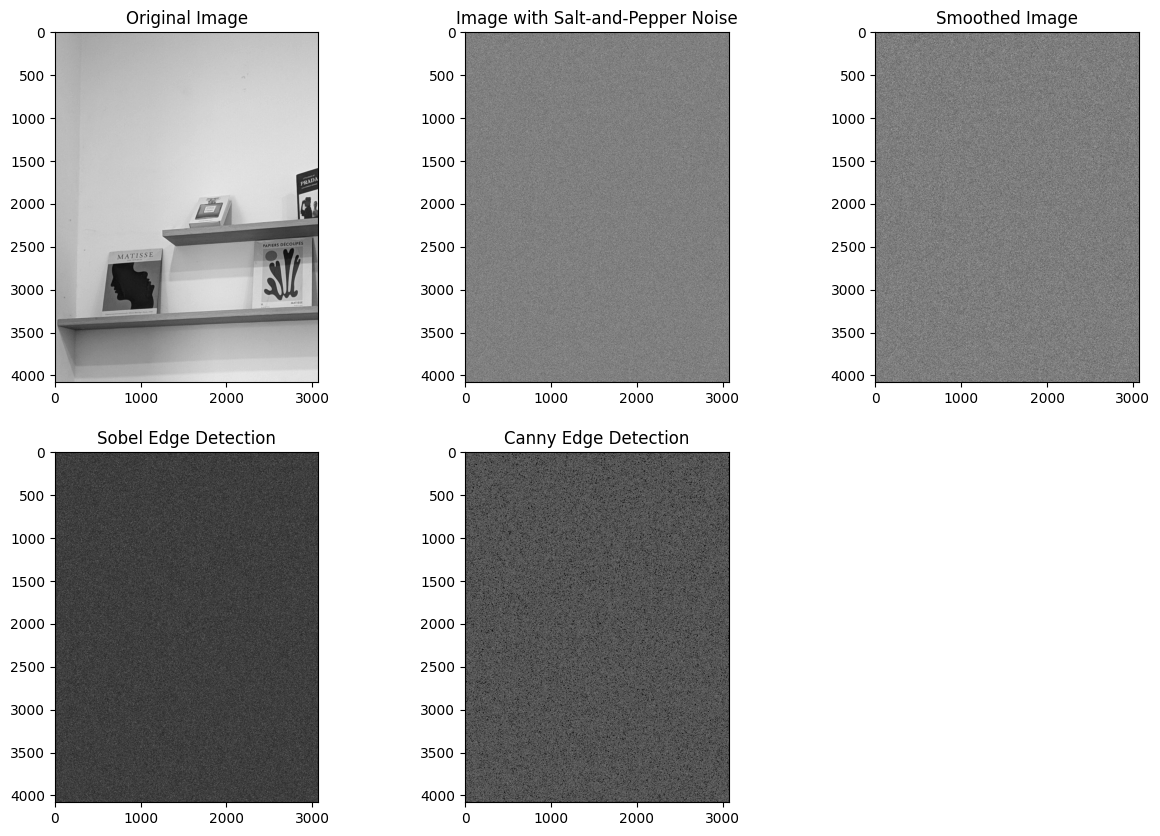

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca gambar dan menambahkan derau salt-and-pepper
image = cv2.imread('/content/drive/MyDrive/UTS_PCD_2206152/frame.jpeg')  # Ganti dengan path gambar
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menambahkan derau salt-and-pepper
noisy_image = cv2.randu(gray.copy(), 0, 255)
noisy_image = np.where(noisy_image > 240, 255, noisy_image)  # Membuat derau putih
noisy_image = np.where(noisy_image < 10, 0, noisy_image)  # Membuat derau hitam

# 2. Lakukan Gaussian smoothing untuk mengurangi derau
smoothed_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# 3. Deteksi Tepi menggunakan Sobel
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# 4. Deteksi Tepi menggunakan Canny
canny_edges = cv2.Canny(np.uint8(smoothed_image), 100, 200)

# 5. Menampilkan hasilnya
plt.figure(figsize=(15, 10))

# Menampilkan gambar asli
plt.subplot(2, 3, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Image')

# Menampilkan citra dengan derau
plt.subplot(2, 3, 2), plt.imshow(noisy_image, cmap='gray'), plt.title('Image with Salt-and-Pepper Noise')

# Menampilkan citra yang telah dihaluskan dengan Gaussian filter
plt.subplot(2, 3, 3), plt.imshow(smoothed_image, cmap='gray'), plt.title('Smoothed Image')

# Menampilkan hasil deteksi tepi dengan Sobel
plt.subplot(2, 3, 4), plt.imshow(sobel_magnitude, cmap='gray'), plt.title('Sobel Edge Detection')

# Menampilkan hasil deteksi tepi dengan Canny
plt.subplot(2, 3, 5), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection')

plt.show()


# Hasil Perbandingannya:

Setelah melakukan Gaussian smoothing pada citra yang mengandung derau salt-and-pepper, perbandingan yang dihaslkan diantara metode Sobel dan Canny menunjukkan hasil yang berbeda. Sobel menghasilkan deteksi tepi yang tajam namun cenderung lebih lebar, sensitif terhadap perubahan intensitas yang tajam, dan bisa mendeteksi tepi palsu, meskipun derau sudah dikurangi. Sebaliknya, Canny lebih unggul dalam hal akurasi dan presisi, menghasilkan tepi yang lebih halus dengan ketebalan satu piksel berkat langkah-langkah tambahan seperti penipisan non-maksimum dan thresholding histeresis, yang mengurangi deteksi tepi palsu dan menghasilkan hasil yang lebih stabil meskipun ada derau. Secara keseluruhan, Canny lebih cocok untuk citra dengan derau tinggi dan aplikasi yang membutuhkan akurasi tinggi, sementara Sobel lebih efisien namun kurang presisi dalam mendeteksi tepi dengan derau yang tersisa.